In [1]:
from imageai.Detection import ObjectDetection
from keras.preprocessing import image
from matplotlib import pyplot as plt
from boxing import draw_boxes
import os

Using TensorFlow backend.


In [2]:
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join(os.getcwd() , 'DATA/model/yolo.h5'))
detector.loadModel()

In [3]:
img = image.load_img('DATA/images/raccoon-1.jpg')
img = image.img_to_array(img)

In [4]:
_, boxes = detector.detectObjectsFromImage(input_type='array', input_image=img, output_type='array',
                                                minimum_percentage_probability=50)

In [5]:
bbs = []
for box in boxes:
    bb = dict()
    bb['xmin'] = int(box['box_points'][0])
    bb['ymin'] = int(box['box_points'][1])
    bb['xmax'] = int(box['box_points'][2])
    bb['ymax'] = int(box['box_points'][3])
    bb['class'] = box['name']
    bb['prob'] = box['percentage_probability']
    bbs.append(bb)

In [6]:
def draw_boxes(img, boxes):
    import cv2
    import numpy as np
    
    for box in boxes:
        ann = box['class']+' '+str(box['prob'])[:5] if 'prob' in box else box['class']
        pts = np.array([[[box['xmin']-1, box['ymin']-23],
                         [box['xmin']+len(ann)*11.2, box['ymin']-23],
                         [box['xmin']+len(ann)*11.2, box['ymin']],
                         [box['xmin']-1, box['ymin']]]], dtype=np.int32)
        img = cv2.fillPoly(img, pts, (0, 255, 0))
        img = cv2.rectangle(img, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 255, 0), 2)
        #draw = ImageDraw.Draw(Image.fromarray(np.asarray(img, dtype="uint8")))
        #draw.text((box['xmin'], box['ymin'] - 6), ann, font=font)
        cv2.putText(img,
                    ann,
                    (box['xmin'], box['ymin'] - 6),
                    16,
                    1.5e-3 * img.shape[0],
                    (0,0,0),
                    2,
                    cv2.LINE_AA)
    return img.astype('uint8')

In [7]:
outImg = draw_boxes(img=img, boxes=bbs)

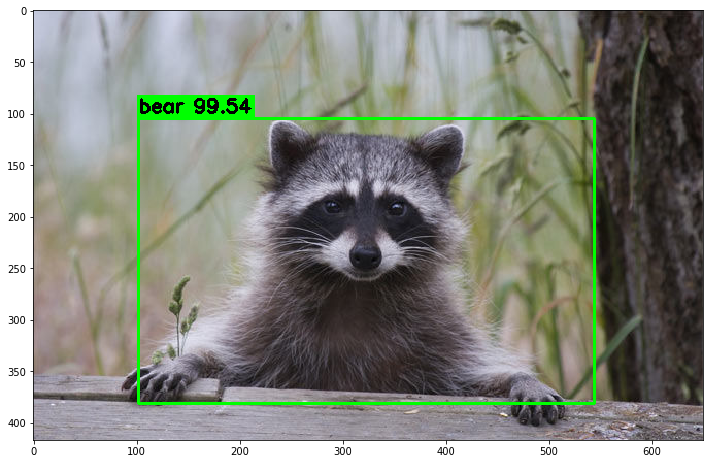

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(outImg)
plt.show()